In [13]:
import json

import matplotlib.pyplot as plt
import numpy as np

In [14]:
dataset_path = "../datasets/UrbanVehicle"

## Load records (except features)
records = list()
with open(f"{dataset_path}/records/records.json", mode="r", encoding="utf-8") as file:
    for record_id, line in enumerate(file):
        record = json.loads(line)
        del record["car_feature"]
        del record["plate_feature"]
        del record["plate_text"]
        record["record_id"] = record_id
        records.append(record)

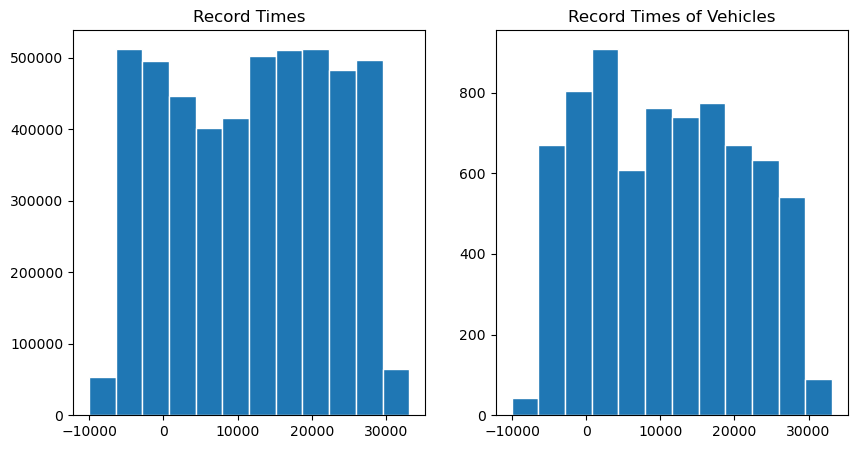

In [15]:
record_times = np.array([record["time"] for record in records])
vehicle_record_times = np.array([record["time"] for record in records if record["vehicle_id"] is not None])

# Records extend over 12h
min_time = record_times.min()  # -10050s
max_time = record_times.max()  # 33150s

min_vehicle_time = vehicle_record_times.min()  # -9821s
max_vehicle_time = vehicle_record_times.max()  # 33093s

## Visualize records distribution over time
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.hist(
    record_times,
    bins=12,
    range=(min_time, max_time),
    edgecolor="white"
)
ax1.set_title("Record Times")

ax2.hist(
    vehicle_record_times,
    bins=12,
    range=(min_time, max_time),
    edgecolor="white"
)
ax2.set_title("Record Times of Vehicles")
plt.show()

In [16]:
## Load trajectories
trajectories = []
with open(f"{dataset_path}/trajectories.json", mode="r", encoding="utf-8") as file:
    for line in file:
        trajectory = json.loads(line)
        trajectory["xyt"].sort(key=lambda l: l[2])
        trajectory["start_time"] = trajectory["xyt"][0][2]
        trajectory["end_time"] = trajectory["xyt"][-1][2]
        trajectory["duration"] = trajectory["end_time"] - trajectory["start_time"]
        del trajectory["xyt"]
        trajectories.append(trajectory)

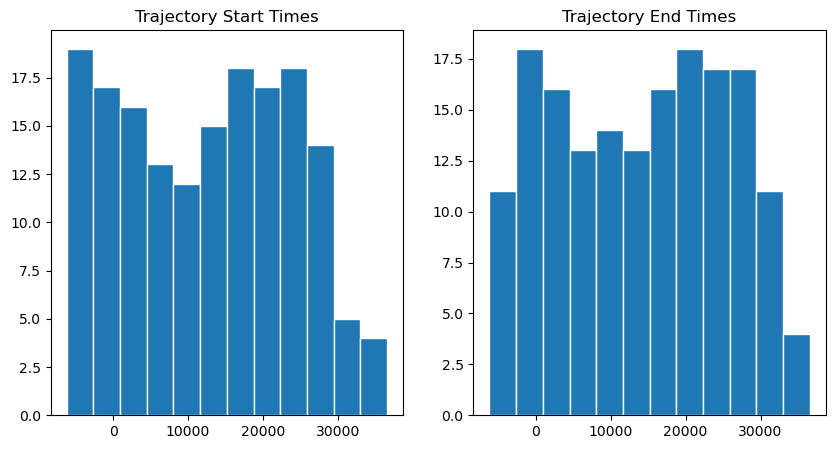

In [17]:
trajectory_start_times = np.array([trajectory["start_time"] for trajectory in trajectories])
trajectory_end_times = np.array([trajectory["end_time"] for trajectory in trajectories])

min_trajectory_start_time = trajectory_start_times.min()  # -6195s
max_trajectory_end_time = trajectory_end_times.max()  # 36568s

## Visualize trajectory distribution over time
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.hist(
    trajectory_start_times,
    bins=12,
    range=(min_trajectory_start_time, max_trajectory_end_time),
    edgecolor="white"
)
ax1.set_title("Trajectory Start Times")

ax2.hist(
    trajectory_end_times,
    bins=12,
    range=(min_trajectory_start_time, max_trajectory_end_time),
    edgecolor="white"
)
ax2.set_title("Trajectory End Times")
plt.show()

In [18]:
# No trajectories start before the min record time
before_min_time_trajectories = [trajectory for trajectory in trajectories if trajectory["start_time"] < min_time]
# Trajectories for vehicles 36, 114, 120, 122 end after the max record time
after_max_time_trajectories = [trajectory for trajectory in trajectories if trajectory["end_time"] > max_time]

# No trajectories start before the min vehicle time
before_min_vehicle_time_trajectories = [trajectory for trajectory in trajectories if
                                        trajectory["start_time"] < min_vehicle_time]
# Trajectories for vehicles 36, 114, 120, 122 end after the max vehicle time
after_max_vehicle_time_trajectories = [trajectory for trajectory in trajectories if
                                       trajectory["end_time"] > max_vehicle_time]

In [19]:
# min_system_time = max(min_time, min(min_vehicle_time, min_trajectory_start_time))  # -9821s
# max_system_time = min(max_time, max(max_vehicle_time, max_trajectory_end_time))  # 33150s
min_system_time = -9821
max_system_time = 33093

system_records = [record for record in records if min_system_time < record["time"] < max_system_time]
print(len(system_records))

4889302
